In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nl
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dff = pd.read_csv('/content/gdrive/My Drive/NBME/features.csv')
dff.head(15)

,feature_num,case_num,feature_text,Unnamed: 3,Tag,sex_variable
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...,NaN,Family history,0
1,1,0,Family-history-of-thyroid-disorder,NaN,Family history,0
2,2,0,Chest-pressure,NaN,Symptoms,0
3,3,0,Intermittent-symptoms,NaN,Symptoms,0
4,4,0,Lightheaded,NaN,Symptoms,0
5,5,0,No-hair-changes-OR-no-nail-changes-OR-no-tempe...,NaN,Background,0
6,6,0,Adderall-use,NaN,Background,0
7,7,0,Shortness-of-breath,NaN,Symptoms,0
8,8,0,Caffeine-use,NaN,Background,0
9,9,0,heart-pounding-OR-heart-racing,NaN,Symptoms,0


In [ ]:
dff['Tag'].head(), dff['Tag'][0]

(0    Family history
 1    Family history
 2          Symptoms
 3          Symptoms
 4          Symptoms
 Name: Tag, dtype: object, 'Family history')

In [ ]:
dfn = pd.read_csv('/content/gdrive/My Drive/NBME/patient_notes.csv')

In [ ]:
dfn['pn_history'][0]

"17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std"

In [ ]:
dfn[10000:10010]

,pn_num,case_num,pn_history
10000,35073,3,Patient is a 35 yo male with no PMH who presen...
10001,35074,3,35 yo M with 2 months of epigastric pain. Pain...
10002,35075,3,"A 35-year-old male, has come to the physician'..."
10003,35076,3,HPI:\r\nMr. Hamilton is a 35yo male who presen...
10004,35077,3,Mr Hamilton is a 35 yo M with no PMH who prese...
10005,35078,3,A 35 YO M w/ history of long term motrin use f...
10006,35079,3,Patient is a 35 year old man experiencing abdo...
10007,35080,3,"35 y/o m in office c/o epigastric pain, starte..."
10008,35081,3,35 yo smoker M presents with 2 months of worse...
10009,35082,3,"CC:"" stomach problem""\r\n35 yo M c/o gradual o..."


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
nl.download('punkt')
from nltk import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
string1 = "Hey, this is a good song; I like that song"

print(re.split('; |, |\*|\n', string1))

['Hey', 'this is a good song', 'I like that song']


In [ ]:

charCount = len(string1)
wordCount = len(word_tokenize(string1))
print(f"chars {charCount}  words {wordCount}")

chars 42  words 12


In [ ]:
myString = "This is a test\n Hello there; welcome. My name is Bala"

#sentences = myString.split('.')
sentences = re.split('; |\. |, |\*|\n', myString)
myString, sentences
for sentence in sentences:
  wordCount = len(word_tokenize(sentence))
  print(f"Sentence is -- {sentence} -- Length is {wordCount}  \n")


Sentence is -- This is a test -- Length is 4  

Sentence is --  Hello there -- Length is 2  

Sentence is -- welcome -- Length is 1  

Sentence is -- My name is Bala -- Length is 4  



In [ ]:
dfn.shape[0]

42146

In [ ]:
# Find the longest sentence

#for mySentence in sent_tokenize(paragraph):

num_notes = dfn.shape[0]
print(f"Number of notes - {num_notes}")
#num_notes = 1
maxLength = 0

for i in range(num_notes):
  paragraph = dfn['pn_history'][i]
  sentences = re.split('; |\. |\* |\n', paragraph)
  j=0
  for mySentence in sentences:
    # TODO: need to remove punctuation from calculation below
    wordLength = len(word_tokenize(mySentence))
    maxLength = max(maxLength,wordLength)
    #print(f"Sentence {j} - {mySentence}")
    #print(f"   Length of para {i} sentence {j} : {wordLength}")
    j=j+1

print(f"Max length in words : {maxLength}")

Number of notes - 42146
Max length in words : 187


In [ ]:
testSentence = "-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav"
wordList = word_tokenize(testSentence)
i=0
for myWord in wordList:
  print(f"Word# {i} - {myWord}")
  i=i+1

Word# 0 - -began
Word# 1 - 2-3
Word# 2 - months
Word# 3 - ago
Word# 4 - ,
Word# 5 - sudden
Word# 6 - ,
Word# 7 - intermittent
Word# 8 - for
Word# 9 - 2
Word# 10 - days
Word# 11 - (
Word# 12 - lasting
Word# 13 - 3-4
Word# 14 - min
Word# 15 - )
Word# 16 - ,
Word# 17 - worsening
Word# 18 - ,
Word# 19 - non-allev/aggrav


In [ ]:
def defineCaseFeatureVar(mycase, myfeature):
  return mycase + myfeature

In [ ]:
# Assign a category variable for every combination of feature number and case number in the file features.csv

dff['case_num'] = dff['case_num'].apply(str)
dff['feature_num'] = dff['feature_num'].apply(str)

dff['Category']= dff.apply(lambda x: defineCaseFeatureVar(x['case_num'],x['feature_num'] ), axis=1)
dff = dff.drop(dff.columns[3], axis=1)
dff.head(5)

,feature_num,case_num,feature_text,sex_variable,Category
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...,0,00
1,1,0,Family-history-of-thyroid-disorder,0,01
2,2,0,Chest-pressure,0,02
3,3,0,Intermittent-symptoms,0,03
4,4,0,Lightheaded,0,04


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/NBME/train.csv')
df.head(5)

,id,case_num,pn_num,feature_num,annotation,location
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724']
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693']
2,00016_002,0,16,2,['chest pressure'],['203 217']
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258']


In [ ]:
# Determine the categorical variable for each row in the file train.csv; Use a lambda function
df['case_num'] = df['case_num'].apply(str)
df['feature_num'] = df['feature_num'].apply(str)

df['Category']= df.apply(lambda x: defineCaseFeatureVar(x['case_num'],x['feature_num'] ), axis=1)
df.head(15) 

,id,case_num,pn_num,feature_num,annotation,location,Category
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],00
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],01
2,00016_002,0,16,2,['chest pressure'],['203 217'],02
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",03
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],04
5,00016_005,0,16,5,[],[],05
6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']",06
7,00016_007,0,16,7,[],[],07
8,00016_008,0,16,8,[],[],08
9,00016_009,0,16,9,"['palpitations', 'heart beating/pounding']","['26 38', '96 118']",09


In [ ]:
# function to get patient notes
def getPatientNotes(pn):
  if (pn< num_notes):
    return dfn['pn_history'][pn]
  else:
    return ''

In [ ]:
## Add patient notes in train.csv dataframe
df['pn_num'] = df['pn_num'].apply(int)

df['patient_notes'] = df.apply(lambda x: getPatientNotes(x['pn_num']), axis=1)
df.head(-5)

,id,case_num,pn_num,feature_num,annotation,location,Category,patient_notes
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],00,HPI: 17yo M presents with palpitations. Patien...
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],01,HPI: 17yo M presents with palpitations. Patien...
2,00016_002,0,16,2,['chest pressure'],['203 217'],02,HPI: 17yo M presents with palpitations. Patien...
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",03,HPI: 17yo M presents with palpitations. Patien...
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],04,HPI: 17yo M presents with palpitations. Patien...
...,...,...,...,...,...,...,...,...
14290,95333_907,9,95333,907,[],[],9907,
14291,95333_908,9,95333,908,['Nausea'],['354 360'],9908,
14292,95333_909,9,95333,909,[],[],9909,
14293,95333_910,9,95333,910,['lives with roomate'],['576 594'],9910,


In [ ]:
dff.head()

,feature_num,case_num,feature_text,Tag,sex_variable,Category
0,0,0,Family-history-of-MI-OR-Family-history-of-myoc...,Family history,0,00
1,1,0,Family-history-of-thyroid-disorder,Family history,0,01
2,2,0,Chest-pressure,Symptoms,0,02
3,3,0,Intermittent-symptoms,Symptoms,0,03
4,4,0,Lightheaded,Symptoms,0,04


In [ ]:
# Clean the annotation field; remove the initial brackets, quotes and their closing
# IMPROVE MORE WITH REGEX

df['clean_annotation'] = df['annotation'].apply(lambda x: x[2:-2] )
df.head(-5)

,id,case_num,pn_num,feature_num,annotation,location,Category,patient_notes,clean_annotation
0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],00,HPI: 17yo M presents with palpitations. Patien...,dad with recent heart attcak
1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],01,HPI: 17yo M presents with palpitations. Patien...,"mom with ""thyroid disease"
2,00016_002,0,16,2,['chest pressure'],['203 217'],02,HPI: 17yo M presents with palpitations. Patien...,chest pressure
3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",03,HPI: 17yo M presents with palpitations. Patien...,"intermittent episodes', 'episode"
4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],04,HPI: 17yo M presents with palpitations. Patien...,felt as if he were going to pass out
...,...,...,...,...,...,...,...,...,...
14290,95333_907,9,95333,907,[],[],9907,,
14291,95333_908,9,95333,908,['Nausea'],['354 360'],9908,,Nausea
14292,95333_909,9,95333,909,[],[],9909,,
14293,95333_910,9,95333,910,['lives with roomate'],['576 594'],9910,,lives with roomate


In [ ]:
# function to get tag based on case number & feature number

def defineTagBasedOnCaseFeature(mycase, myfeature):
  mycategory = str(mycase) + str(myfeature)
  # print(f"Case - {mycase}, Feature - {myfeature}, Tag - {tagvalue}")
  return dff[dff['Category'] == mycategory].iloc[0,3]

In [ ]:
# Testing
testtag = defineTagBasedOnCaseFeature('0', '2')
print(f"Testtag - S{testtag}E")

Testtag - SSymptomsE


In [ ]:
# Populate tag column to df dataframe
#   - For each row in df dataframe, find its case number-feature number 
#   - identify corresponding Tag from dff dataframe & populate in tag column in df dataframe

df['Tag'] = df.apply(lambda x: defineTagBasedOnCaseFeature(x['case_num'], x['feature_num']), axis=1)

In [ ]:
num_test_entries = df.shape[0]  
print(f"Number of test entries - {num_test_entries}")

Number of test entries - 14300


In [ ]:
# Count number of unique notes in train file

#df['pn_num'].value_counts()
list_of_notes = df['pn_num'].unique()
num_unique_notes = len(list_of_notes)
print(f"Number of test entries - {num_test_entries}")
print(f"Number of unique notes - {num_unique_notes}")
#df['patient_notes'][11:20]



Number of test entries - 14300
Number of unique notes - 1000


In [ ]:
#teststring = '[\'palpitations\', \'heart beating/pounding\', \'hi there\']'
teststring = '[\'adderall\', \'adderrall\', \'adderrall\']'
print(f"{teststring}")

teststring = re.sub("/"," ",teststring)
print(f"{teststring}")

teststring = teststring[2:-2]
print(f"{teststring}")

teststring = re.sub("'","",teststring)
print(f"{teststring}")

teststring = re.sub(", ",",", teststring)

phrases = re.split(',', teststring)
num_phrases = len(phrases)
print(f"Number of phrases: {num_phrases}")
for phrase in phrases:
  print(f"{phrase}")




['adderall', 'adderrall', 'adderrall']
['adderall', 'adderrall', 'adderrall']
adderall', 'adderrall', 'adderrall
adderall, adderrall, adderrall
Number of phrases: 3
adderall
adderrall
adderrall


In [ ]:
def cleanText(myText):
  myText = re.sub("/"," ",myText)
  #myText = myText[2:-2]
  myText = re.sub("'","",myText)
  #myText = re.sub(", ", ",",myText)
  myText = re.sub(",", " ", myText)
  myText = re.sub("\r","",myText)
  myText = re.sub("\"","",myText)
  myText = re.sub("  ", " ", myText)
  myText = re.sub("   ", " ", myText)
  return myText

In [ ]:
# drop rows with empty annotations
print(f"BEFORE Dropping - Number of test entries - {num_test_entries}")
df = df[df['annotation'] != '[]']
df.reset_index(inplace=True)
num_test_entries = df.shape[0]
print(f"AFTER Dropping - Number of test entries - {num_test_entries}")


BEFORE Dropping - Number of test entries - 14300
AFTER Dropping - Number of test entries - 9901


In [ ]:
df.head(15)

,index,id,case_num,pn_num,feature_num,annotation,location,Category,patient_notes,clean_annotation,Tag
0,0,00016_000,0,16,0,['dad with recent heart attcak'],['696 724'],00,HPI: 17yo M presents with palpitations. Patien...,dad with recent heart attcak,Family history
1,1,00016_001,0,16,1,"['mom with ""thyroid disease']",['668 693'],01,HPI: 17yo M presents with palpitations. Patien...,"mom with ""thyroid disease",Family history
2,2,00016_002,0,16,2,['chest pressure'],['203 217'],02,HPI: 17yo M presents with palpitations. Patien...,chest pressure,Symptoms
3,3,00016_003,0,16,3,"['intermittent episodes', 'episode']","['70 91', '176 183']",03,HPI: 17yo M presents with palpitations. Patien...,"intermittent episodes', 'episode",Symptoms
4,4,00016_004,0,16,4,['felt as if he were going to pass out'],['222 258'],04,HPI: 17yo M presents with palpitations. Patien...,felt as if he were going to pass out,Symptoms
5,6,00016_006,0,16,6,"['adderall', 'adderrall', 'adderrall']","['321 329', '404 413', '652 661']",06,HPI: 17yo M presents with palpitations. Patien...,"adderall', 'adderrall', 'adderrall",Background
6,9,00016_009,0,16,9,"['palpitations', 'heart beating/pounding']","['26 38', '96 118']",09,HPI: 17yo M presents with palpitations. Patien...,"palpitations', 'heart beating/pounding",Symptoms
7,10,00016_010,0,16,10,['3-4 months of'],['56 69'],010,HPI: 17yo M presents with palpitations. Patien...,3-4 months of,Symptoms
8,11,00016_011,0,16,11,['17yo'],['5 9'],011,HPI: 17yo M presents with palpitations. Patien...,17yo,Profile
9,12,00016_012,0,16,12,['M'],['10 11'],012,HPI: 17yo M presents with palpitations. Patien...,M,Profile


In [ ]:
# If multiple annotations in one row in test.csv, separate them into multiple lines

# - check if number of annotations is one or more. If one, no action needed
# - If more then one annotation, separate them into additional rows

#num_unique_notes = 10
for i in range(num_unique_notes):
  #print(f"====================================================")
  this_note_number = list_of_notes[i]
  #print(f"Reviewing note {this_note_number}  - Type: {type(this_note_number)}")

  this_note = getPatientNotes(this_note_number)
  #print(f"NOTE: {this_note}")

  # 
  df_temp = df[df['pn_num'] == this_note_number]
  list_annotations = df_temp.iloc[:,5]
  num_annotations = len(df_temp)
  #print(f"Number of annotations {num_annotations}")
  #print(f"SUB-ANNOTATIONS\n{list_annotations}")

  j=0
  for annotation in list_annotations:
    #print(f"Note {this_note_number}  j={j}")
    this_category = df_temp.iloc[j,7]
    #print(f"--> GETTING CATEGORY : {this_category}")

    #print(f"Reviewing annotation {j}: {annotation}")
    annotation = cleanText(annotation)

    sub_annotations = re.split(',', annotation)
    num_sub_annotations = len(sub_annotations) 
    #print(f"-->Number of subannotations {num_sub_annotations}")
    j=j+1

    if num_sub_annotations > 1:
      for k in range(num_sub_annotations):
        dfnew = {'pn_num': this_note_number, 'clean_annotation': sub_annotations[k], 'Category': this_category}
        df = df.append(dfnew,ignore_index=True)
        
      
print(f"DONE")

DONE


In [ ]:
num_test_entries = df.shape[0]
print(f"AFTER adding additional test entries - Number of test entries - {num_test_entries}")

AFTER adding additional test entries - Number of test entries - 9901


In [ ]:
def CheckAnnotationsNotInSentence(mysentence, list_annotations, num_annotation):
  for annotation in list_annotations:
    if ((annotation in mysentence) and (annotation != '')):
      return bool(False)
  return bool(True)

In [ ]:
#flag = CheckAnnotationsNotInSentence('This is a test for me',['hey','a test'],2)
flag = CheckAnnotationsNotInSentence('Of note patient endorses abusing adderall, primarily to study (1-3 times per week)',['','a test'],2)
flag

True

In [ ]:
def MakeSureSentenceIsNotEmpty(myText):
  myText = re.sub(" ","",myText)
  myText = re.sub(",","",myText)
  thislength = len(myText)
  if thislength > 0:
    return True
  return False
  

In [ ]:
#testing
testsen = "   a "
flag = MakeSureSentenceIsNotEmpty(testsen)
if flag == True:
  print(f"Sentence is not empty")
else:
  print(f"Sentence is empty")

Sentence is not empty


In [ ]:
dfn['pn_history'][16]

'HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms'

In [ ]:
# Add additional rows to test.csv showing Category DISCARD

#   - Get notes# from list of notes in test.csv
#   - Get full notes for notes#. Tokenize by sentence
#   - For every sentence, find if some part of it has been annotated
#   - If no part of the sentence is annotated, add sentence to df dataframe with Category 'DISCARD', and Tage 'DISCARD'

#num_unique_notes = 10
counter = num_test_entries

for i in range(num_unique_notes):
  this_note_number = list_of_notes[i]
  #print(f"Reviewing note {this_note_number}  - Type: {type(this_note_number)}")

  this_note = getPatientNotes(this_note_number)
  #print(f"NOTE: {this_note}")

  # check if any training annotation is contained in mysentence
  df_temp = df[df['pn_num'] == this_note_number]
  list_annotations = df_temp.iloc[:,9]
  num_annotations = len(df_temp)
  
  #list_sub_annotations = df[df['pn_num'] == this_note_number].loc[:,'clean_annotation']
  #num_sub_annotations = len(df[df['pn_num'] == this_note_number])
  #print(f"Number of sub annotations {num_annotations}")
  #print(f"ANNOTATIONS\n{list_annotations}")

  this_note = cleanText(this_note)
  sentences = re.split('; |\. |\* |\n', this_note)
  #print(f"Number of sentences in note: {len(sentences)}")
  for mysentence in sentences:
    #print(f"\nSentence # - {mysentence}")
    if CheckAnnotationsNotInSentence(mysentence,list_annotations,num_annotations):
      if MakeSureSentenceIsNotEmpty(mysentence):
        dfnew = {'pn_num': this_note_number, 'clean_annotation': mysentence, 'Category':'DISCARD'}
        #df = df.append(dfnew,ignore_index=True)
        #print(f"\nAdding sentence -> Note # {this_note_number} Sentence -> {mysentence}, Length - {len(mysentence)}")
        #counter = counter+1
    else:
      #print(f"\nAnnotation in Sentence -- {mysentence}")
      counter = counter


print(f"Number of new entries  - {counter-num_test_entries}")
print(f"Total number of train entries - {df.shape[0]}")


Number of new entries  - 0
Total number of train entries - 9901


In [ ]:
  print(f"All done; Ready to review")


All done; Ready to review


In [ ]:
num_unique_notes

1000

# **NEURAL NETWORK MODEL**

---



In [ ]:
# drop rows with category of count 1 -> 8807, 2209
print(f"BEFORE -- Total number of train entries - {df.shape[0]}")
df = df[df['Category'] != str(2209)]
df = df[df['Category'] != str(8807)]
df = df[df['Category'] != str(9911)]
print(f"AFTER -- Total number of train entries - {df.shape[0]}")

BEFORE -- Total number of train entries - 9901
AFTER -- Total number of train entries - 9897


In [ ]:
# Shuffle df
df_shuffled = df.sample(frac=1, random_state=53) 
df_shuffled.head()

,index,id,case_num,pn_num,feature_num,annotation,location,Category,patient_notes,clean_annotation,Tag
7025,9898,61768_610,6,61768,610,['albuteral inhaler without relief'],['374 406'],6610,,albuteral inhaler without relief,Symptoms
5328,7608,52932_506,5,52932,506,['negative for chest pain'],['689 701;762 772'],5506,,negative for chest pain,Symptoms
8787,12410,83953_808,8,83953,808,['Started 3 weeks ago'],['41 60'],8808,,Started 3 weeks ago,Symptoms
5636,8051,54511_517,5,54511,517,['26'],['17 19'],5517,,26,Profile
7038,9915,70163_706,7,70163,706,"['never became pregnant', 'infertility']","['362 383', '440 451']",7706,,"never became pregnant', 'infertility",Background


In [ ]:
# Split test data into test & validate - frac = 10%
from sklearn.model_selection import train_test_split
train_annotations, val_annotations, train_labels, val_labels = train_test_split(df_shuffled['clean_annotation'].to_numpy(), df_shuffled['Category'].to_numpy(), test_size=0.1, random_state=32)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
mysplitter = StratifiedShuffleSplit(n_splits=1,random_state=12)
X = df_shuffled['clean_annotation']
y = df_shuffled['Category']

# Good read for stratification - https://www.kaggle.com/code/viswanathanc/stratifiedshufflesplit-working-with-less-data/notebook


In [ ]:
pd.DataFrame(y).value_counts()

Category
5501        100
4401        100
2205        100
4409        100
8802         99
           ... 
5515         19
2215         15
9907         11
2207         11
8809          7
Length: 140, dtype: int64

In [ ]:
for train,test in mysplitter.split(X,y):     #this will splits the index
    train_annotations = X.iloc[train]
    train_labels = y.iloc[train]
    val_annotations = X.iloc[test]
    val_labels = y.iloc[test]

In [ ]:
print (train_annotations.shape, train_labels.shape, val_annotations.shape, val_labels.shape)
num_categories_in_original = df_shuffled['Category'].nunique()
print (f"Number of categories in original set {num_categories_in_original} ")

num_categories_in_train = pd.DataFrame(train_labels).nunique()
print (f"Number of categories in train set {num_categories_in_train} ")
num_categories_in_train.value_counts()

num_categories_in_val = pd.DataFrame(val_labels).nunique()
print (f"Number of categories in val set {num_categories_in_val} ")
#num_categories_in_val

# Get missing categories

(8907,) (8907,) (990,) (990,)
Number of categories in original set 140 
Number of categories in train set Category    140
dtype: int64 
Number of categories in val set Category    140
dtype: int64 


In [ ]:
pd.DataFrame(train_labels).value_counts()

Category
5501        90
2205        90
4409        90
4401        90
8802        89
            ..
5515        17
2215        14
9907        10
2207        10
8809         6
Length: 140, dtype: int64

In [ ]:
pd.DataFrame(val_labels).value_counts().loc['4400']
len("Pain has been constant and began shortly after waking up")

56

In [ ]:
# find the maximum length of any annotated text
num_training_samples = len(train_annotations)
print(f" Number of training samples {num_training_samples}")
this_sum =0
numavg = 2000
for i in range(numavg):
  #print(f"i = {i} - text = {df_shuffled['clean_annotation'][i]}")
  this_sum = this_sum + len(df_shuffled['clean_annotation'][i])

this_sum = this_sum/numavg
print(f"Average length - {this_sum}")

 Number of training samples 8907
Average length - 18.5515


In [ ]:
# Merge all the text in clean_annotation into one text. Generate a vocab from that

text = ''
length = df.shape[0]

for i in range(length):
  text = text + df.iloc[i,9]
 
vocab = sorted(set(text))
print(vocab)
len(vocab)

[' ', '"', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', '[', '\\', ']', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~']


80

In [ ]:
# Determine a mapping for the vocabulary: char_to_ind and ind_to_char
# for pair in enumerate(vocab):
#    print(pair)

char_to_ind = {u:i for i, u in enumerate(vocab)}
char_to_ind['H']

32

In [ ]:
# build reverse mapping - ind_to_char
ind_to_char = np.array(vocab)
ind_to_char[32]

'H'

**Potential Tweaks from here**

---

- take vectorization from BERT
- take embedding from BERT


In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 4.3 MB/s 
     |████████████████████████████████| 462 kB 70.5 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text 

In [ ]:
tfhub_handle_encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'
tfhub_handle_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

print('BERT model selected           :', tfhub_handle_encoder)
print('Preprocessing model auto-selected:', tfhub_handle_preprocess)

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocessing model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

text_test = ['this is such an amazing movie. I loved it']
text_preprocessed = bert_preprocess_model(text_test)

In [ ]:
text_preprocessed

{'input_mask': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape=(1, 128), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)
print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.92580503 -0.35639146 -0.67353773  0.637214    0.6406335  -0.22586766
  0.642733    0.14035171 -0.7676265  -0.99996054 -0.37259412  0.9434641 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.32184064  0.00989162  0.16893226 ... -0.25000465  0.4130199
   0.25615606]
 [-0.28587258 -0.44366628  0.2979756  ... -0.6674695   1.1626828
   0.15335408]
 [ 0.16452767 -0.19023006  0.70756656 ... -0.5410915   0.38242954
   0.45496365]
 ...
 [ 1.1526556   0.35924572  0.4864326  ...  0.2751942   0.59719443
  -0.10572643]
 [-0.06283119 -0.73079026  0.05512173 ...  0.23924887  0.29840034
  -0.07768309]
 [ 0.42760342  0.16895297  0.2984304  ...  0.27277425 -0.334918
  -0.1694208 ]]


In [ ]:
#bert_results

In [ ]:
num_features = 140

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dense(256, activation="relu")(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(num_features, activation="softmax", name='classifier')(net)
  return tf.keras.Model(text_input, net)
  

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(bert_raw_result)

tf.Tensor(
[[0.01462091 0.00168487 0.0037172  0.01047975 0.00461892 0.00520836
  0.0107609  0.00811682 0.00540504 0.01072337 0.0028747  0.01040114
  0.00414098 0.00585564 0.00283975 0.0028308  0.01127828 0.00715692
  0.00747569 0.00316231 0.0045781  0.00640382 0.0055347  0.00755234
  0.00864311 0.01089834 0.00268795 0.00990468 0.00644157 0.00646901
  0.00913095 0.00326319 0.00284125 0.0031074  0.00574736 0.01064423
  0.01712609 0.01087894 0.02673116 0.00417142 0.01391566 0.00659613
  0.00446289 0.00534453 0.00673268 0.00572785 0.0088497  0.01330645
  0.00739794 0.00488527 0.00596907 0.01196017 0.00396977 0.00527379
  0.00207617 0.00296162 0.00337455 0.00583989 0.00383748 0.0068911
  0.00840387 0.02061106 0.00361792 0.00683483 0.00734265 0.00680311
  0.00401473 0.00278826 0.01026511 0.01327167 0.00435023 0.00673169
  0.00372033 0.00894618 0.00449668 0.00737978 0.00530058 0.00800397
  0.00665969 0.00542668 0.00677438 0.00361606 0.0042475  0.00284455
  0.00212435 0.00200821 0.00448443 0.0

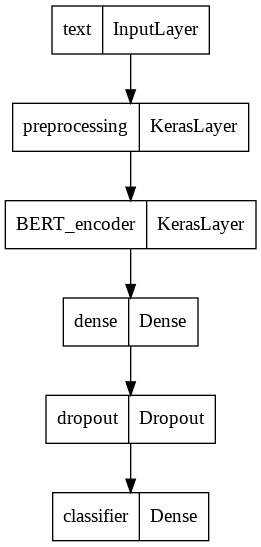

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 99 kB 11.1 MB/s 
     |████████████████████████████████| 352 kB 67.1 MB/s 
     |████████████████████████████████| 237 kB 73.8 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 90 kB 13.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 47.8 MB 70.5 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 1.2 MB 55.2 MB/s 


In [ ]:
from official.nlp import optimization  # to create AdamW optimizer

In [ ]:
num_features, num_training_samples

(140, 8907)

In [ ]:
epochs = 1
steps_per_epoch = num_training_samples
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
train_annotations = train_annotations.to_numpy().astype('str')
train_labels = train_labels.to_numpy().astype('str')
val_annotations = val_annotations.to_numpy().astype('str')
val_labels = val_labels.to_numpy().astype('str')
train_annotations.dtype, train_labels.dtype, val_annotations.dtype, val_labels.dtype

(dtype('<U294'), dtype('<U4'), dtype('<U214'), dtype('<U4'))

In [ ]:
train_labels_cat = pd.get_dummies(train_labels,drop_first=False)
val_labels_cat = pd.get_dummies(val_labels,drop_first=False)
train_labels_cat

,00,01,010,011,012,02,03,04,05,06,...,9906,9907,9908,9909,9910,9912,9913,9914,9915,9916
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8903,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_annotations.shape, train_labels_cat.shape, val_annotations.shape, val_labels.shape, val_labels_cat.shape

((8907,), (8907, 140), (990,), (990,), (990, 140))

In [ ]:
#checkpoint_path = '/content/gdrive/My Drive/NBME/SavedModel/cp1.ckpt'
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

In [ ]:
#print(f'Training model with {tfhub_handle_encoder}')
#history = classifier_model.fit(train_annotations, train_labels_cat, epochs=1, validation_data=(val_annotations, val_labels_cat), callbacks=[cp_callback])


In [ ]:
# Test model for new phrase
new_annotations = np.array(['pressure in chest','shortness of breath'])
new_annotations.shape
predicted_output = classifier_model.predict(new_annotations)
predicted_output.shape
predicted_output0 = np.argmax(predicted_output[0])
predicted_output1 = np.argmax(predicted_output[1])
predicted_output0, predicted_output1

(116, 36)

In [ ]:
#Test full notes para
input_para = '17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland\'s mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std '
input_para = cleanText(input_para)
test_sentences = re.split('; |\. |\* |\n', input_para)

for test_sentence in test_sentences:
  print(f"Sentence --> {test_sentence}")

Sentence --> 17-year-old male has come to the student health clinic complaining of heart pounding
Sentence --> Mr
Sentence --> Clevelands mother has given verbal consent for a history physical examination and treatment
Sentence --> -began 2-3 months ago sudden intermittent for 2 days(lasting 3-4 min) worsening non-allev aggrav
Sentence --> -associated with dispnea on exersion and rest stressed out about school
Sentence --> -reports fe feels like his heart is jumping out of his chest
Sentence --> -ros:denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam
Sentence --> -pmh:non meds :aderol (from a friend) nkda
Sentence --> -fh:father had MI recently mother has thyroid dz
Sentence --> -sh:non-smoker mariguana 5-6 months ago 3 beers on the weekend basketball at school
Sentence --> -sh:no std 


In [ ]:
def PrintTop3OtherClasses(arraylen, test_predictions):
  #arraylen = len(test_predictions_class)
  #thistype = test_predictions_class.dtype
  sorted_predictions = np.argsort(test_predictions)
  print(f"Top 3 args - {ind_to_label[sorted_predictions[arraylen-1]]}-{test_predictions[sorted_predictions[arraylen-1]]}")
  print(f"             {ind_to_label[sorted_predictions[arraylen-2]]}-{test_predictions[sorted_predictions[arraylen-2]]}")
  print(f"             {ind_to_label[sorted_predictions[arraylen-3]]}-{test_predictions[sorted_predictions[arraylen-3]]}")
  #print (f"Type is {thistype}")
  return

In [ ]:
labelvocab = sorted(set(train_labels))
labelvocab

# Assign unique integers to each char
label_to_ind = {u:i for i, u in enumerate(labelvocab)}
label_to_ind['3306']

48

In [ ]:
ind_to_label = np.array(labelvocab)
ind_to_label[48]

'3306'

In [ ]:
new_annotations = np.array(['17-year-old male, has come to the student health clinic complaining of heart pounding'])
predicted_output = classifier_model.predict(new_annotations)
ind_to_label[np.argmax(predicted_output)]

'8810'

In [ ]:
# For each sentence, call NN model and get output

test_predictions = classifier_model.predict(test_sentences)
test_predictions_class = np.argmax(test_predictions,axis=1)

arraylen = len(test_predictions_class)
test_predictions_class_label = np.empty(arraylen,dtype='U100')
for i in range(arraylen): 
  test_predictions_class_label[i] = ind_to_label[test_predictions_class[i]]
  print(f"Sentence - {test_sentences[i]}")
  print(f"----> Class {test_predictions_class_label[i]}/{test_predictions_class[i]}")
  PrintTop3OtherClasses(num_features, test_predictions[i])
#test_predictions_class, test_predictions_class_label, test_predictions_class.dtype
test_sentences[0], test_predictions[0]

Sentence - 17-year-old male has come to the student health clinic complaining of heart pounding
----> Class 2213/38
Top 3 args - 2213-0.021633759140968323
             8810-0.021097999066114426
             4403-0.020617568865418434
Sentence - Mr
----> Class 2211/36
Top 3 args - 2211-0.020523542538285255
             8810-0.01596352644264698
             1112-0.014698300510644913
Sentence - Clevelands mother has given verbal consent for a history physical examination and treatment
----> Class 2213/38
Top 3 args - 2213-0.02216741070151329
             8810-0.018368756398558617
             2211-0.017605232074856758
Sentence - -began 2-3 months ago sudden intermittent for 2 days(lasting 3-4 min) worsening non-allev aggrav
----> Class 8810/116
Top 3 args - 8810-0.024426346644759178
             2213-0.018852798268198967
             2211-0.018680300563573837
Sentence - -associated with dispnea on exersion and rest stressed out about school
----> Class 2211/36
Top 3 args - 2211-0.017257038

('17-year-old male has come to the student health clinic complaining of heart pounding',
 array([0.00890714, 0.0018902 , 0.00323203, 0.01062412, 0.00483721,
        0.00402004, 0.00931679, 0.006478  , 0.00465052, 0.01449628,
        0.00287899, 0.01431544, 0.00409612, 0.00887787, 0.00288097,
        0.00256338, 0.01515909, 0.00704327, 0.00557247, 0.00316956,
        0.0059529 , 0.00797321, 0.0053382 , 0.00988334, 0.00568489,
        0.00954142, 0.00317516, 0.00994974, 0.00656027, 0.00831207,
        0.01006704, 0.00245654, 0.00245349, 0.00232769, 0.00557653,
        0.00750821, 0.01774448, 0.01206024, 0.02163376, 0.00424702,
        0.01324609, 0.00862621, 0.00464336, 0.00398764, 0.00642515,
        0.00485009, 0.00769926, 0.01261759, 0.00664806, 0.00414133,
        0.0056314 , 0.0149384 , 0.00366762, 0.00559459, 0.00252887,
        0.00326564, 0.00502231, 0.00519836, 0.00481131, 0.00699128,
        0.00684899, 0.02061757, 0.006403  , 0.00692926, 0.00950954,
        0.00480032, 0.00511

In [ ]:
print("Now what?")

Now what?


============================================================================================================================================================

In [ ]:
# How to bias the model, so it makes use of the known person info
# Idea 1: Apply weights to the loss function to weigh the person related classes more
#      Ref: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data
# Idea 2: Develop different models for different standard patients
# Idea 3: One model to determine sex, one model to determine symptoms, one model to determine family history

In [ ]:
# Read test data
test_case = 0

In [ ]:
def getCaseForFeature(i):
  label = ind_to_label[i]
  case = int(label[0])
  return case

In [ ]:
# Define feature weights

feature_weights = np.empty(num_features,dtype='int')
for i in range(num_features):
  this_case = getCaseForFeature(i)
  #print(f"This case {this_case}")
  if (this_case == test_case):
    feature_weights[i] = 100
  else:
    feature_weights[i] = 1

#feature_weights[num_features-1] = 1

In [ ]:
num_features,feature_weights

(140, array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1]))

In [ ]:
# Define class_weight dictionary

#wi = [0,10,20,30]
#d = dict(enumerate(wi, 45))
#d

class_weight = dict(enumerate(feature_weights,0))
#class_weight

In [ ]:
#classifier_model.fit(train_annotations, train_labels_cat, epochs=1, validation_data=(val_annotations, val_labels_cat), callbacks=[cp_callback], class_weight=class_weight)


In [ ]:
# For each sentence, call NN model and get output

test_predictions = classifier_model.predict(test_sentences)
test_predictions_class = np.argmax(test_predictions,axis=1)

arraylen = len(test_predictions_class)
test_predictions_class_label = np.empty(arraylen,dtype='U100')
for i in range(arraylen): 
  test_predictions_class_label[i] = ind_to_label[test_predictions_class[i]]
  print(f"Sentence - {test_sentences[i]}")
  print(f"----> Class {test_predictions_class_label[i]}/{test_predictions_class[i]}")
  PrintTop3OtherClasses(num_features, test_predictions[i])
#test_predictions_class, test_predictions_class_label, test_predictions_class.dtype
#test_sentences[0], test_predictions[0]

Sentence - 17-year-old male has come to the student health clinic complaining of heart pounding
----> Class 2213/38
Top 3 args - 2213-0.021633759140968323
             8810-0.021097999066114426
             4403-0.020617568865418434
Sentence - Mr
----> Class 2211/36
Top 3 args - 2211-0.020523542538285255
             8810-0.01596352644264698
             1112-0.014698300510644913
Sentence - Clevelands mother has given verbal consent for a history physical examination and treatment
----> Class 2213/38
Top 3 args - 2213-0.02216741070151329
             8810-0.018368756398558617
             2211-0.017605232074856758
Sentence - -began 2-3 months ago sudden intermittent for 2 days(lasting 3-4 min) worsening non-allev aggrav
----> Class 8810/116
Top 3 args - 8810-0.024426346644759178
             2213-0.018852798268198967
             2211-0.018680300563573837
Sentence - -associated with dispnea on exersion and rest stressed out about school
----> Class 2211/36
Top 3 args - 2211-0.017257038

In [ ]:
print("GO to next step)")

GO to next step)


In [ ]:
# Answers unsatisfactory
# Try sending smaller text sequences to model for each test annotation rather than the whole sentence




---



In [ ]:
model1 = build_classifier_model()

In [ ]:
model1.compile(optimizer=optimizer,loss=loss,metrics=metrics)

In [ ]:
loss,acc = model1.evaluate(val_annotations, val_labels_cat, verbose=2)
print("Untrained model, accuracy = {:5.2f}%".format(100*acc))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


31/31 - 7s - loss: 5.1103 - categorical_accuracy: 0.0131 - 7s/epoch - 241ms/step
Untrained model, accuracy =  1.31%


In [ ]:
checkpoint_path = '/content/gdrive/My Drive/NBME/SavedModel/cp1.ckpt'
model1.load_weights(checkpoint_path)
loss,acc = model1.evaluate(val_annotations, val_labels_cat, verbose=2)
print("Trained model, accuracy = {:5.2f}%".format(100*acc))
print("GO to next step)")

31/31 - 7s - loss: 0.3483 - categorical_accuracy: 0.8414 - 7s/epoch - 213ms/step
Trained model, accuracy = 84.14%
GO to next step)


In [ ]:
#Test full notes para
input_para = '17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland\'s mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std '
input_para = cleanText(input_para)
test_sentences = re.split('; |\. |\* |\n', input_para)


for test_sentence in test_sentences:
  print(f"Sentence --> {test_sentence}")

Sentence --> 17-year-old male has come to the student health clinic complaining of heart pounding
Sentence --> Mr
Sentence --> Clevelands mother has given verbal consent for a history physical examination and treatment
Sentence --> -began 2-3 months ago sudden intermittent for 2 days(lasting 3-4 min) worsening non-allev aggrav
Sentence --> -associated with dispnea on exersion and rest stressed out about school
Sentence --> -reports fe feels like his heart is jumping out of his chest
Sentence --> -ros:denies chest pain dyaphoresis wt loss chills fever nausea vomiting pedal edeam
Sentence --> -pmh:non meds :aderol (from a friend) nkda
Sentence --> -fh:father had MI recently mother has thyroid dz
Sentence --> -sh:non-smoker mariguana 5-6 months ago 3 beers on the weekend basketball at school
Sentence --> -sh:no std 


In [ ]:
test_string = "abcd "
test_string1 = test_string[:-1]
test_string, test_string1

('abcd ', 'abcd')

In [ ]:
def GetPhrase(wordlist, start, mylength):
  newstring = ''
  for i in range(start,start+mylength):
    newstring = newstring + wordlist[i] + " "
    
  #remove last space
  newstring = newstring[:-1]
  
  return newstring


In [ ]:
test_sentences[1]

'Mr'

In [ ]:
test_sentences = ["Male has come to the student health clinic complaining of heart pounding."]
test_predictions = model1.predict(test_sentences)
test_predictions_class = np.argmax(test_predictions,axis=1)

arraylen = len(test_predictions_class)
test_predictions_class_label = np.empty(arraylen,dtype='U100')
for i in range(arraylen): 
  test_predictions_class_label[i] = ind_to_label[test_predictions_class[i]]
  print(f"Sentence - {test_sentences[i]}")
  print(f"----> Class {test_predictions_class_label[i]}/{test_predictions_class[i]}")
  PrintTop3OtherClasses(num_features, test_predictions[i])

test_predictions[0]

Sentence - Male has come to the student health clinic complaining of heart pounding.
----> Class 09/12
Top 3 args - 09-0.37857019901275635
             5504-0.2651226818561554
             5505-0.11379439383745193


array([4.84672812e-04, 7.46891252e-04, 1.76277442e-03, 1.36875419e-03,
       5.57353313e-04, 8.64524685e-04, 2.54564482e-04, 4.09991408e-05,
       6.24283799e-04, 3.81917926e-05, 3.56281118e-04, 8.25841562e-04,
       3.78570199e-01, 6.33655058e-04, 2.47183343e-04, 7.80763730e-05,
       2.19749357e-03, 1.38955086e-03, 1.29763939e-04, 2.13033869e-04,
       4.91888355e-03, 5.68185933e-04, 6.59407116e-04, 1.26928114e-03,
       1.49367697e-04, 2.66556483e-04, 1.47180763e-04, 5.79197076e-05,
       2.21943413e-03, 4.80595278e-03, 1.09614497e-02, 7.24604644e-04,
       4.48890822e-03, 5.75035717e-03, 5.87704671e-05, 2.22949806e-04,
       3.03416373e-03, 8.24586779e-04, 2.69979155e-05, 3.32829106e-04,
       2.81212095e-04, 3.86416708e-04, 9.20700096e-03, 1.59430746e-02,
       2.64684227e-03, 1.45535378e-04, 5.79516229e-04, 9.75516450e-05,
       1.56385312e-03, 1.05253542e-02, 9.14241537e-04, 1.09260948e-03,
       1.85865781e-03, 1.54553927e-04, 3.32168420e-04, 5.00802742e-03,
      

In [ ]:
input_para = '17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland\'s mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std '
input_para = cleanText(input_para)
test_sentences = re.split('; |\. |\* |\n', input_para)

phraselengthmin = 1
phraselengthmax = 2
phraselist = []
test_sentence = "17 year old Male has come to the student health clinic complaining of heart pounding"

for mylength in range(phraselengthmin,phraselengthmax+1):
  wordlist = word_tokenize(test_sentence)
  sentlength = len(wordlist)
  for i in range(sentlength-mylength+1):
    newphrase = GetPhrase(wordlist,i,mylength)
    phraselist.append(newphrase)

print(f"Number of phrases - {len(phraselist)}")
numphrases = len(phraselist)
phraselist



Number of phrases - 29


['17',
 'year',
 'old',
 'Male',
 'has',
 'come',
 'to',
 'the',
 'student',
 'health',
 'clinic',
 'complaining',
 'of',
 'heart',
 'pounding',
 '17 year',
 'year old',
 'old Male',
 'Male has',
 'has come',
 'come to',
 'to the',
 'the student',
 'student health',
 'health clinic',
 'clinic complaining',
 'complaining of',
 'of heart',
 'heart pounding']

In [ ]:
#phraselist = ['heart pounding']
test_predictions = model1.predict(phraselist)
test_predictions_class = np.argmax(test_predictions,axis=1)
test_predictions_probs = np.amax(test_predictions,axis=1)

final_prediction_prob  = np.amax(test_predictions_probs)
max_prediction_phrase_index = np.argmax(test_predictions_probs)
final_prediction_class =  test_predictions_class[max_prediction_phrase_index]


arraylen = len(test_predictions_class)
test_predictions_class_label = np.empty(arraylen,dtype='U100')
for i in range(arraylen): 
  test_predictions_class_label[i] = ind_to_label[test_predictions_class[i]]
  print(f"Sentence - {phraselist[i]}")
  print(f"----> Class {test_predictions_class_label[i]}/{test_predictions_class[i]}")
  PrintTop3OtherClasses(num_features, test_predictions[i])

#test_predictions[0]
print(f"Test Predictions probs - {test_predictions_probs}")
print(f"Final prediction class {ind_to_label[final_prediction_class]}/{final_prediction_class}")
print(f"Final prediction probability {final_prediction_prob}")
print(f"TAGGED PHRASE --> {phraselist[max_prediction_phrase_index]}")


Sentence - 17
----> Class 011/3
Top 3 args - 011-0.626376748085022
             6602-0.3409867286682129
             5517-0.0029828734695911407
Sentence - year
----> Class 7702/100
Top 3 args - 7702-0.18930009007453918
             6607-0.1792762726545334
             8808-0.09649467468261719
Sentence - old
----> Class 08/11
Top 3 args - 08-0.09880245476961136
             3307-0.06399565935134888
             9902-0.058586232364177704
Sentence - Male
----> Class 6601/87
Top 3 args - 6601-0.356054425239563
             012-0.3229348957538605
             3308-0.2921576201915741
Sentence - has
----> Class 3312/54
Top 3 args - 3312-0.1399216204881668
             4401-0.06599903106689453
             7702-0.054103244096040726
Sentence - come
----> Class 2208/34
Top 3 args - 2208-0.12584897875785828
             08-0.07793334871530533
             8802-0.07629863172769547
Sentence - to
----> Class 2208/34
Top 3 args - 2208-0.33137765526771545
             5501-0.1100856214761734
         

In [ ]:
a = np.arange(6).reshape(2,3) + 10
print(a)
print(np.argmax(a, axis=1))
print(np.amax(a,axis=1))

[[10 11 12]
 [13 14 15]]
[2 2]
[12 15]


In [ ]:
# Loop over test file - for everyline , loop over train data to implement min & max for phrase length for a feature
# Loop over sentences in notes to create phrase list to run model on
# Run model for phrase list for a sentence, looking for feature
# If feature found (prob > clip level), add to annotations list with positions

#num_test_entries
dftest = pd.read_csv('/content/gdrive/My Drive/NBME/test.csv')
num_test_file_entries = dftest.shape[0]
dftest.head(10)
#print(f"Number of test file entries - {num_test_file_entries}")

,id,case_num,pn_num,feature_num
0,00016_000,0,16,0
1,00016_001,0,16,1
2,00016_002,0,16,2
3,00016_003,0,16,3
4,00016_004,0,16,4


In [ ]:
# Assign a category variable to the test file
dftest['case_num'] = dftest['case_num'].apply(str)
dftest['feature_num'] = dftest['feature_num'].apply(str)

dftest['Category']= dftest.apply(lambda x: defineCaseFeatureVar(x['case_num'],x['feature_num'] ), axis=1)
#dff = dff.drop(dff.columns[3], axis=1)
dftest.head(5)

,id,case_num,pn_num,feature_num,Category
0,00016_000,0,16,0,00
1,00016_001,0,16,1,01
2,00016_002,0,16,2,02
3,00016_003,0,16,3,03
4,00016_004,0,16,4,04


In [ ]:
dfn.head(20)
#this_pn = dfn[dfn['pn_num'] == this_testfile_pn][pn_history]
#print(dfn['pn_history'][16])
#print(dfn['pn_history'][17])

  #this_pn = df[df['pn_num'] == this_testfile_pn]['patient_notes'][0]

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...
5,5,0,"17 yo m, presenting with palpitations/increase..."
6,6,0,17 yo male presents with 3-4 month history of ...
7,7,0,17 yo male presents with a 2-3 month history o...
8,8,0,HPI: 17 YO complains of intermittent heart pal...
9,9,0,Mr. Cleveland is a 17 yo M who presents to cli...


In [ ]:
!pip install fuzzyfinder

In [ ]:
from fuzzyfinder import fuzzyfinder
suggestions = fuzzyfinder('abc', ['abc ', 'defabca', 'aagbec', 'xyz', 'qux'])
#print(list(suggestions))
next(suggestions)

'abc '

In [ ]:
!pip install fuzzysearch

     |████████████████████████████████| 112 kB 4.2 MB/s 
  Created wheel for fuzzysearch: filename=fuzzysearch-0.7.3-cp37-cp37m-linux_x86_64.whl size=280769 sha256=f73533a3430237981a0bb3c8098af0266f1b25810c9c057981ecb6375ab7609a
  Stored in directory: /root/.cache/pip/wheels/59/11/b5/bae34cc61880d909103c30a1c547df857f5a46adeabfd922b5
Successfully built fuzzysearch


In [ ]:
from fuzzysearch import find_near_matches
# search for 'PATTERN' with a maximum Levenshtein Distance of 1
mymatch = find_near_matches('PATTERN', '---PATERN---', max_l_dist=1)
print(mymatch)
this_start = mymatch[0].start
this_end = mymatch[0].end
matched_pattern = mymatch[0].matched
this_start, this_end, matched_pattern

[Match(start=3, end=9, dist=1, matched='PATERN')]


(3, 9, 'PATERN')

In [ ]:
found_phrase = 'I found a phrase\r\n ; Hey there'
phraselist = found_phrase.split()
phraselist[0]+" " + phraselist[1], phraselist
newone = phraselist[3]+" " + phraselist[4] + " " + phraselist[5]
num = len(phraselist)
position = np.zeros(num)
temp = 0
position[0] = 0
for i in range(1,num):
  position[i] = position[i-1]+len(phraselist[i-1])+1


print(f"{newone}")
num, position

phrase ; Hey


(7, array([ 0.,  2.,  8., 10., 17., 19., 23.]))

In [ ]:
num_test_file_entries
dfn

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student heal..."
1,1,0,17 yo male with recurrent palpitations for the...
2,2,0,Dillon Cleveland is a 17 y.o. male patient wit...
3,3,0,a 17 yo m c/o palpitation started 3 mos ago; \...
4,4,0,17yo male with no pmh here for evaluation of p...
...,...,...,...
42141,95330,9,Ms. Madden is a 20 yo female presenting w/ the...
42142,95331,9,A 20 YO F CAME COMPLAIN A DULL 8/10 HEADACHE T...
42143,95332,9,Ms. Madden is a 20yo female who presents with ...
42144,95333,9,Stephanie madden is a 20 year old woman compla...


In [ ]:
import csv
header = ['id','location']
test_row = ['0000','25 45']

with open('/content/gdrive/My Drive/NBME/annotation_outputs.csv', 'w', encoding='UTF8') as csv_output_file:
  my_csv_writer = csv.writer(csv_output_file)
  my_csv_writer.writerow(header)


with open('/content/gdrive/My Drive/NBME/annotation_outputs.csv', 'w', encoding='UTF8') as csv_output_file:
  my_csv_writer = csv.writer(csv_output_file)
  my_csv_writer.writerow(test_row)


In [ ]:
this_testfile_case = 0
this_testfile_feature = 12
dftemp = dff[ (dff['case_num'] == str(this_testfile_case)) & (dff['feature_num'] == str(this_testfile_feature)) ]
  #this_testfile_feature_sexflag = int(dftemp['sex_variable'][0])
tempval = 10* dftemp['sex_variable']
'''
print(f"value = {tempval}")
dftemp['sex_variable'].iloc[0]
'''

np.maximum(0.4523, 0.8765)

0.8765

In [ ]:
csv_df = pd.DataFrame()
dfnew = {'id': '0000', 'annotation': '25-87'}
csv_df = csv_df.append(dfnew,ignore_index=True)
print(csv_df)
dfnew2 = {'id': '0001', 'annotation': '25-870'}
csv_df = csv_df.append(dfnew2,ignore_index=True)
print(csv_df)
csv_df.to_csv('/content/gdrive/My Drive/NBME/annotation_outputs.csv',index=False)

     id annotation
0  0000      25-87
     id annotation
0  0000      25-87
1  0001     25-870


In [ ]:
#num_test_file_entries = 13
csv_df = pd.DataFrame()
for i in range(num_test_file_entries):
  print(f"Working through Test file Line {i}  ....")
  this_testfile_case = dftest['case_num'][i]
  this_testfile_feature = dftest['feature_num'][i]
  this_testfile_pn = dftest['pn_num'][i]
  this_testfile_id = dftest['id'][i]
  
  this_test_file_category_index = label_to_ind[dftest['Category'][i]]
  print(f"   Case {this_testfile_case}; PN {this_testfile_pn}; Feature {this_testfile_feature}")
  print(f"   Category {dftest['Category'][i]};  Index {this_test_file_category_index} ")

  # Find min & max phrase length in annotations
  dftemp = df[ (df['case_num'] == str(this_testfile_case)) & (df['feature_num'] == str(this_testfile_feature)) ]
  numentries = dftemp.shape[0]
  print(f"   Num = {numentries}")
  dftemp_annotations = dftemp['clean_annotation']
  phrases_min_length = 100
  phrases_max_length = 0
  for this_annotation in dftemp_annotations:
    num_phrases = len(word_tokenize(this_annotation))
    #print(f"   This annotation - {this_annotation}; Length {num_phrases}")
    if num_phrases < phrases_min_length:
      phrases_min_length = num_phrases
    if num_phrases > phrases_max_length:
      phrases_max_length = num_phrases
  #print(f"{this_testfile_case.dtype}")
  print(f"Min length {phrases_min_length};  Max length {phrases_max_length}")

  # Create list of phrases of length between min & Max
  input_para = dfn['pn_history'][this_testfile_pn]
  #input_para = dfn['pn_history'][45]
  input_para = cleanText(input_para)
  print(f"Input para - {input_para}")
  
  #test_sentences = re.split('; |\. |\* |\n', input_para)
  test_sentences = re.split('\n', input_para)
  num_sentences = len(test_sentences)
  print(f"Number of sentences - {num_sentences}")
  phraselist = []
  for sentence in test_sentences:
    print(f"Sentence - {sentence}")
    #wordlist = word_tokenize(sentence)
    wordlist = sentence.split()
    sentlength = len(wordlist)
    for mylength in range(phrases_min_length,phrases_max_length+1):
      for start in range(sentlength-mylength+1):
        newphrase = GetPhrase(wordlist,start,mylength)
        phraselist.append(newphrase)

  # Evaluate phrases with model
  print(f"Number of phrases = {len(phraselist)}")
  test_predictions = model1.predict(phraselist)
  test_predictions_phrase = np.argmax(test_predictions,axis=0)
  test_predictions_probs = np.amax(test_predictions,axis=0)   

  final_prediction_prob  = test_predictions_probs[this_test_file_category_index]
  max_prediction_phrase_index = test_predictions_phrase[this_test_file_category_index]  

  print(f"Final prediction probability {final_prediction_prob}")
  print(f"TAGGED PHRASE --> {phraselist[max_prediction_phrase_index]}")
  PrintTop3OtherClasses(num_features, test_predictions[max_prediction_phrase_index])

  start = input_para.find(phraselist[max_prediction_phrase_index])
  end = start + len(phraselist[max_prediction_phrase_index]) -1

  #mymatch = find_near_matches(phraselist[max_prediction_phrase_index], input_para, max_l_dist=5)
  #start = mymatch[0].start
  #end = mymatch[0].end
  #matched_phrase = mymatch[0].matched

  #found_phrase = phraselist[max_prediction_phrase_index]
  #start = input_para.find(found_phrase)
  #if start != -1:
  #  end = start + len(phraselist[max_prediction_phrase_index]) -1
  #else:
  #  first_word = found_phrase.split()[0]



  annotation_string = str(start)+' '+str(end)
  if final_prediction_prob > 0.25:
    print(f"FILE {this_testfile_feature} {start} {end}")
    dfnew = {'id': str(this_testfile_id), 'location': annotation_string}
  else:
    print(f"FILE {this_testfile_feature}")
    dfnew = {'id': str(this_testfile_id), 'location':' '}
  
  print(f"\n\n")
  csv_df = csv_df.append(dfnew,ignore_index=True)

print(f"ALL DONE")
csv_df.to_csv('/content/gdrive/My Drive/NBME/submission.csv',index=False)



Working through Test file Line 0  ....
   Case 0; PN 16; Feature 0
   Category 00;  Index 0 
   Num = 88
Min length 1;  Max length 11
Input para - HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of heart beating pounding out of my chest. 2 days ago during a soccer game had an episode but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall primarily to study (1-3 times per week). Before recent soccer game took adderrall night before and morning of game. Denies shortness of breath diaphoresis fevers chills headache fatigue changes in sleep changes in vision hearing abdominal paun changes in bowel or urinary habits. 
PMHx: none
Rx: uses friends adderrall
FHx: mom with thyroid disease dad with recent heart attcak
All: none
Immunizations: up to date
SHx: Freshmen in college. Endorses 3-4 drinks 3 nights  week (on weekends) denies tabacco endorses trying mariju

In [ ]:
#TO Do:
# combine features relating to patients sex
# if then condition to output or not depending on probability - DONE
# output into file
# re-optimize neural network based on test case patient#
# check if only one patient note

Code to check for sex
  dftemp = dff[ (dff['case_num'] == str(this_testfile_case)) & (dff['feature_num'] == str(this_testfile_feature)) ]
  this_testfile_feature_sexflag = dftemp['sex_variable'].iloc[0]
  #maleprob   =  (test_predictions_probs[12] + test_predictions_probs[51] + test_predictions_probs[88])/3
  #femaleprob =  (test_predictions_probs[25] + test_predictions_probs[34] + test_predictions_probs[66] + test_predictions_probs[70] + test_predictions_probs[99] + test_predictions_probs[110] + test_predictions_probs[139])/7
  maleprob   =  np.amax((test_predictions[12] + test_predictions[51] + test_predictions[88])/3, axis=0)
  femaleprob =  np.amax((test_predictions[25] + test_predictions[34] + test_predictions[66] + test_predictions[70] + test_predictions[99] + test_predictions[110] + test_predictions[139])/7, axis=0)
  if this_testfile_feature_sexflag == 0:
    print(f"REGULAR variable Category{this_testfile_feature} Index{this_test_file_category_index}")
  else:
    print(f"SEX variable Category{this_testfile_feature} Index{this_test_file_category_index}")
    print(f"Male prob: {maleprob} ; Female prob: {femaleprob}")
    test_predictions[this_test_file_category_index] = np.maximum(maleprob,femaleprob)
    print(f"Testing: {test_predictions[this_test_file_category_index]}")

In [ ]:
ph1 = "mom with thyroid disease"
sentence = "FHx: mom with thyroid disease, dad with recent heart attcak"
start = sentence.find(ph1)
start

In [ ]:
  this_pn = dfn['pn_history'][1587]
  this_pn

In [ ]:
  input_para = cleanText(this_pn)
  #input_para = this_pn
  print(f"Input para - {input_para}")

In [ ]:
test_sentences = re.split('\n', input_para)
num_sentences = len(test_sentences)
print(f"Number of sentences - {num_sentences}")
phraselist = []
for sentence in test_sentences:
  print(f"Sentence - {sentence}")

In [ ]:
input_para
start = input_para.find(ph1)
start

In [ ]:
sentence = 'mom: thyroid issues father: heart attack'
print(word_tokenize(sentence))
x = sentence.split()
print(x)

In [ ]:

for sentence in test_sentences:
  wordlist = word_tokenize(sentence)
  sentlength = len(wordlist)
  for mylength in range(phrases_min_length,phrases_max_length+1):
    for start in range(sentlength-mylength+1):
      newphrase = GetPhrase(wordlist,start,mylength)
      print(f"Phrase - {newphrase}")
      phraselist.append(newphrase)

In [ ]:
# TO DO: load Bert NN trained on Pubmed databases

# **References:**

---



---


Named Entity Recognition
https://towardsdatascience.com/named-entity-recognition-ner-meeting-industrys-requirement-by-applying-state-of-the-art-deep-698d2b3b4ede

https://medium.com/analytics-vidhya/ner-tensorflow-2-2-0-9f10dcf5a0a

Reweighting to address classification bias to certain class - https://stackoverflow.com/questions/68600997/full-cnn-model-classification-bias-to-specific-class

Transfer Learning - https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

BERT - https://www.kaggle.com/code/pavansanagapati/knowledge-graph-nlp-tutorial-bert-spacy-nltk/notebook

NER with BERT - https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/BERT/Custom_Named_Entity_Recognition_with_BERT_only_first_wordpiece.ipynb

POS tagging & chunking - https://machinelearningknowledge.ai/tutorial-on-pos-tagging-and-chunking-in-nltk-python/
